In [1]:
# !pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 kB 8.4 MB/s eta 0:00:00


In [1]:
import json
import os
from os import name
import ultralytics
from ultralytics import YOLO
from IPython.display import display, Image
# from google.colab import drive
import zipfile

In [3]:
# !nvidia-smi

Thu Oct  5 10:19:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
HOME = os.getcwd()

In [3]:
ultralytics.checks()
# проверка настроек ultralytics

Ultralytics YOLOv8.0.193  Python-3.10.0 torch-2.0.1+cu117 CPU (Intel Core(TM) i5-5300U 2.30GHz)
Setup complete  (4 CPUs, 7.7 GB RAM, 237.0/893.7 GB disk)


In [4]:
model = YOLO('yolov8m-seg.pt') # подгружаем medium модель для сегментации
# model = YOLO('yolov8n-seg.pt')  # самая легкая модель для дообучения

100%|██████████| 52.4M/52.4M [00:03<00:00, 15.2MB/s]


In [12]:
#ПРОВЕРКА РАБОТЫ МОДЕЛИ
model = ultralytics.YOLO("yolov8n-seg.pt")
results = model.predict(source="https://media.roboflow.com/notebooks/examples/dog.jpeg", conf = 0.3, save=True, save_txt=True)
#conf = 0.1 - захватывает объекты с меньшей вероятностью достоверности
#save = True - сохранение изображения
#save_txt = True - сохранение меток изображения



Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 dog, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict3
1 label saved to runs/segment/predict3/labels


/content


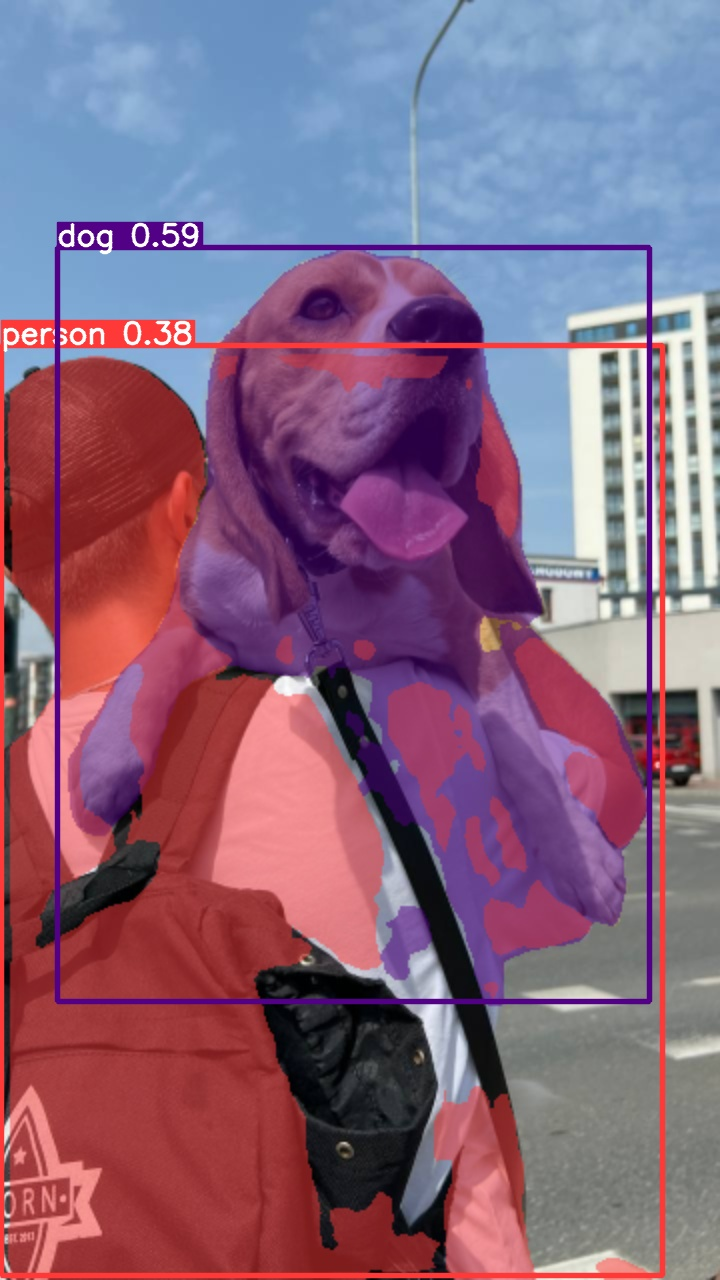

In [13]:
%cd {HOME}
Image(filename='runs/segment/predict3/dog.jpeg', height=600)

In [16]:
# drive.mount('/content/drive') 
#подключение к Гугл-диску

Mounted at /content/drive


Загружаем из директории файл с архивом данных для YOLO

In [6]:
# zip_input = "/content/drive/MyDrive/data_for_yolo_test/datasets.zip"

#данные разметки PyLabel
zip_input = "datasets.zip"

In [ ]:
# zip_input = "datasets_hand.zip"
#данные разметки Darwin

In [7]:
z = zipfile.ZipFile(zip_input, "r")
z.extractall('./datasets')

print(os.listdir())

['datasets', 'datasets.zip', 'datasets_hand.zip', 'yolo8.ipynb', 'yolov8m-seg.pt']


ТРЕНИРОВКА МОДЕЛИ

In [22]:
train = model.train(data="datasets/dirt_custom.yaml", batch=8, epochs=50, imgsz=960, plots= True, seed=0, augment= True)

Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=datasets/dirt_custom.yaml, epochs=50, patience=50, batch=8, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, opt

TypeError: ignored

In [ ]:
# !yolo task=segment mode=train model=yolov8n-seg.pt data=datasets/dirt_custom.yaml batch=8 epochs=50 imgsz=960 plots=true seed=0 augment=true
# тренировка с помощью команд терминала

ВАЛИДАЦИЯ КАСТОМНОЙ МОДЕЛИ

In [23]:
custom_model = YOLO('/content/runs/segment/train2/weights/best.pt') #загрузка натренированной модели

metrics = custom_model.val()
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps

Ultralytics YOLOv8.0.193 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/datasets/val/labels.cache... 6 images, 0 backgrounds, 2 corrupt: 100%|██████████| 6/6 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/val/images/ad000112.png: ignoring corrupt image/label: zero-size array to reduction operation minimum which has no identity
val: WARNING ⚠️ /content/datasets/val/images/ad000113.png: ignoring corrupt image/label: zero-size array to reduction operation minimum which has no identity
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]
                   all          4       1090      0.104     0.0743     0.0604       0.02     0.0946     0.0899     0.0642     0.0186
Speed: 0.6ms preprocess, 109.7ms inference, 0.0ms loss, 25.7ms postproc

array([   0.018622])

Использование натренированной модели сегментации для предсказания на новых данных

In [ ]:
# Предсказание с пользовательской моделью на новых данных
results = custom_model('https://bookshelf.su/wp-content/uploads/2021/08/foksing_7.jpg')


WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
100%|██████████| 59.7k/59.7k [00:00<00:00, 353kB/s]
image 1/1 /content/foksing_7.jpg: 960x1280 (no detections), 25.0ms
Speed: 10.1ms preprocess, 25.0ms inference, 0.7ms postprocess per image at shape (1, 3, 960, 1280)


In [ ]:
#Предсказание с пользовательской моделью на данных датасета
results2 = custom_model('/content/datasets/train/images/ad000002.png') #изображение ad000002.png из данных ручной разметки Darwin


image 1/1 /content/datasets/train/images/ad000002.png: 960x1280 13 insectss, 24.9ms
Speed: 11.1ms preprocess, 24.9ms inference, 4.1ms postprocess per image at shape (1, 3, 960, 1280)


Экспорт модели

In [ ]:
#custom_model.export(format='onnx')
custom_model.export() #если нет аргумента, то формат модели torchscript

Ultralytics YOLOv8.0.168 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from '/content/runs/segment/train2/weights/best.pt' with input shape (1, 3, 1280, 1280) BCHW and output shape(s) ((1, 43, 33600), (1, 32, 320, 320)) (6.6 MB)

TorchScript: starting export with torch 2.0.1+cu118...
TorchScript: export success ✅ 7.4s, saved as '/content/runs/segment/train2/weights/best.torchscript' (13.2 MB)

Export complete (10.2s)
Results saved to /content/runs/segment/train2/weights
Predict:         yolo predict task=segment model=/content/runs/segment/train2/weights/best.torchscript imgsz=1280  
Validate:        yolo val task=segment model=/content/runs/segment/train2/weights/best.torchscript imgsz=1280 data=datasets/custom_sam.yml  
Visualize:       https://netron.app


'/content/runs/segment/train2/weights/best.torchscript'

In [28]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"
# если при архивации возникают проблемы с кодировкой

АРХИВАЦИЯ РЕЗУЛЬТАТОВ

In [29]:
!zip -r /content/yolo.zip /content/runs
# путь и имя нового архива + путь к папке для архивации

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/dog.jpeg (deflated 6%)
  adding: content/runs/segment/ (stored 0%)
  adding: content/runs/segment/predict2/ (stored 0%)
  adding: content/runs/segment/predict2/dog.jpeg (deflated 1%)
  adding: content/runs/segment/predict2/labels/ (stored 0%)
  adding: content/runs/segment/predict2/labels/dog.txt (deflated 78%)
  adding: content/runs/segment/predict/ (stored 0%)
  adding: content/runs/segment/predict/dog.jpeg (deflated 4%)
  adding: content/runs/segment/predict/labels/ (stored 0%)
  adding: content/runs/segment/predict/labels/dog.txt (deflated 81%)
  adding: content/runs/segment/train/ (stored 0%)
  adding: content/runs/segment/train/weights/ (stored 0%)
  adding: content/runs/segment/train/args.yaml (deflated 51%)
  adding: content/runs/segment/train2/ (stored 0%)
  adding: content/runs/segment/train2/labels.jpg (deflat

Автоконвертер для формата coco json в yolo

Требования к данным для yolo включая сегменты: https://docs.ultralytics.com/datasets/segment/

In [ ]:
#from ultralytics.data.converter import convert_coco

#yolo_annotations = convert_coco(labels_dir='path_to_file', use_segments=True)